# Risques Cardio-Vasculaires

    #Ce job va vous permettre de mettre en œuvre une régression logistique. Pour
    analyser une variable binaire (dont les valeurs seraient VRAI/FAUX, 0/1, ou encore
    OUI/NON) en fonction d'une variable explicative quantitative, on peut utiliser une
    régression logistique. La régression logistique consiste à prédire des variables 
    binaires et non à prédire des variables continues.

# une petite veille sur la régression logistique

    #Machine learning :L'apprentissage automatique (en anglais machine learning, littéralement « apprentissage          machine ») ou apprentissage statistique est un champ d'étude de l'intelligence artificielle qui se fonde sur      des approches mathématiques et statistiques pour donner aux ordinateurs la capacité d' « apprendre » à partir      de données, c'est-à-dire d'améliorer leurs performances à résoudre des tâches sans être explicitement              programmés pour chacune. Plus largement, il concerne la conception, l'analyse, l'optimisation, le                  développement et l'implémentation de telles méthodes. 
    
    # le machine learning se repose sur deux points essentiels :
       -les données à exploitées qui sont les exemples à partir duquel l’algorithme va apprendre.
       -l’algorithme d’apprentissage qui est la procédure que l’on fait tourner sur ces données pour produire un            modèle (entraînement ou fitting).
       
    # La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles       de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations         réelles  nombreuses. 
    
  

In [7]:
# importation des librairies nécessaire et chargement de données
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import matplotlib.pyplot as plt


############# Chargement des données sous forme de tableau #################

df = pd.read_csv('cardio_train.csv',sep=';')
#visualisation des données
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# nom des colonne ou attributs
df.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
#type de chaque données
print(df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [10]:
#verification des données nulles
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Ce fichier comporte 12 colonnes :
    AGE​ : integer (number of days)
    HEIGHT​ : integer (cm)
    WEIGHT​ : integer (kg)
    GENDER​ : categorical (1: female, 2: male)
    AP_HIGH​ : systolic blood pressure, integer
    AP_LOW​ : diastolic blood pressure, integer
    CHOLESTEROL​ : categorical (1: normal, 2: above normal, 3: well above normal)
    GLUCOSE​ : categorical (1: normal, 2: above normal, 3: well above normal)
    SMOKE​ : categorical (0: no, 1: yes)
    ALCOHOL​ : categorical (0: no, 1: yes)
    PHYSICAL_ACTIVITY​ : categorical (0: no, 1: yes)
        
    # et la variable cible :
    CARDIO_DISEASE​ : categorical (0: no, 1: yes)

In [11]:
#description des données
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## visualisation avec matplotlib 

    # exploration des données cardio

array([[<AxesSubplot:title={'center':'cardio'}>]], dtype=object)

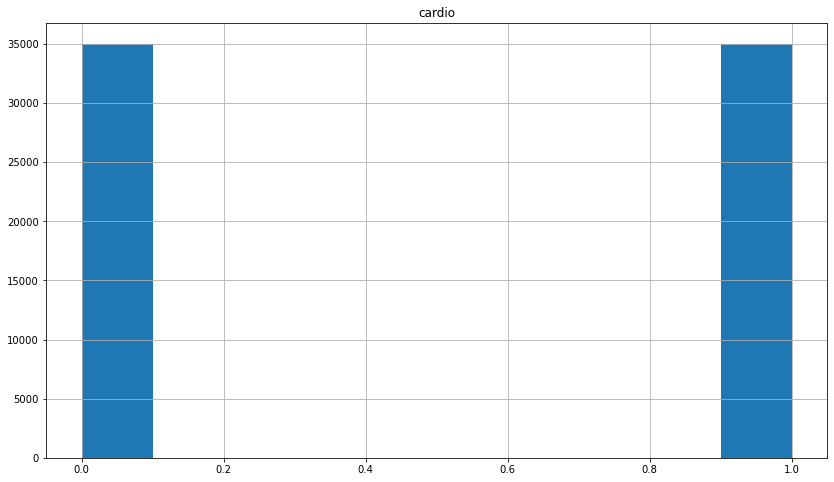

In [12]:
#histogramme de la variable cardio
df.hist(column=['cardio'],figsize=(14,8))


percentage of no risque is 50.029999999999994
percentage of risque 49.97


<AxesSubplot:xlabel='cardio', ylabel='count'>

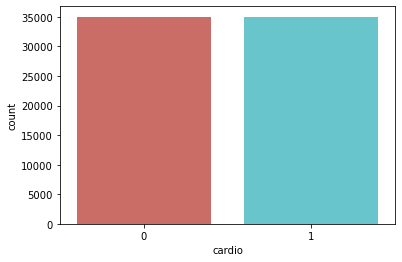

In [13]:
#comptage du nombre de risque ou pas
import seaborn as sns 

count_no_risque = len(df[df['cardio']==0])
count_risque = len(df[df['cardio']==1])
pct_of_no_risque = count_no_risque / (count_no_risque + count_risque)
print("percentage of no risque is", pct_of_no_risque * 100)

pct_of_risque = count_risque / (count_no_risque + count_risque)
print("percentage of risque", pct_of_risque * 100)

#representation
sns.countplot( x="cardio", data=df,palette='hls')


## recherche de lien entre cardio et les features

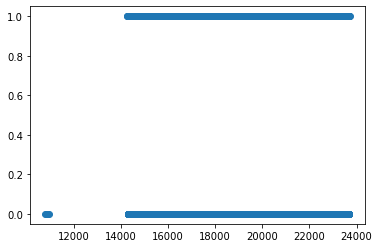

In [14]:
#utilisation de scartter plot de matplotlib
from matplotlib import pyplot
pyplot.scatter(df['age'],df['cardio'])
pyplot.show()

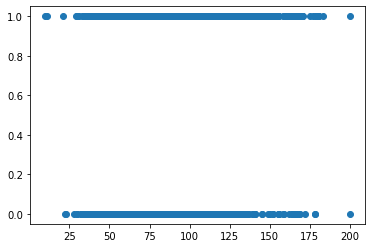

In [15]:
#utilisation de scartter plot de matplotlib
from matplotlib import pyplot
pyplot.scatter(df['weight'],df['cardio'])
pyplot.show()

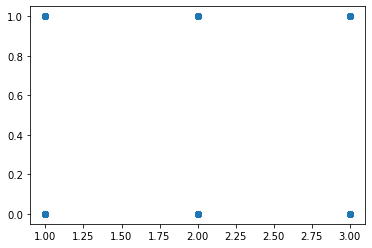

In [16]:
#utilisation de scartter plot de matplotlib
from matplotlib import pyplot
pyplot.scatter(df['cholesterol'],df['cardio'])
pyplot.show()

In [17]:
    # selon le feature cardio a plus de relation avec certaines que d'autres

# visualisation avec seaborn
    #recherche de correlation entre les variables features et le cardio

<AxesSubplot:>

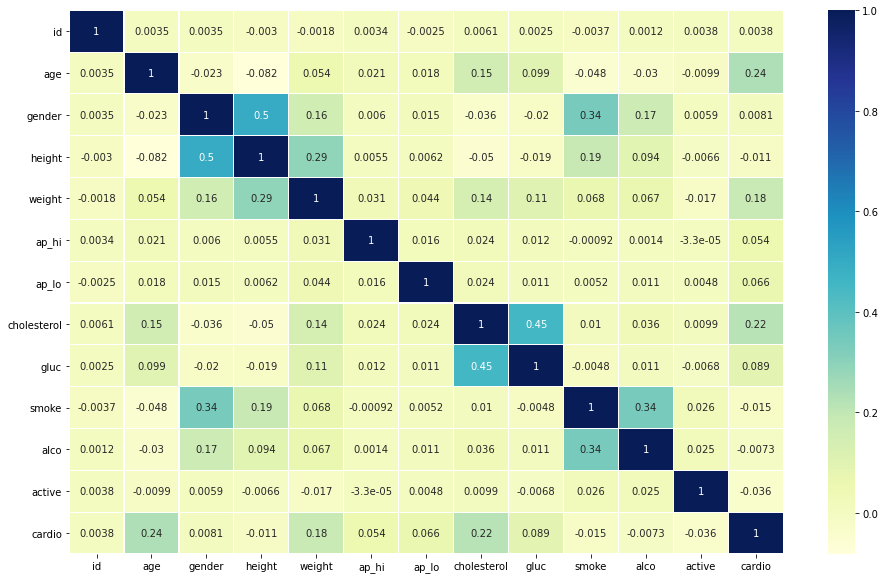

In [18]:
import seaborn as sns 
matrice_corr = df.corr()
f, ax = plt.subplots(figsize =(16, 10)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)

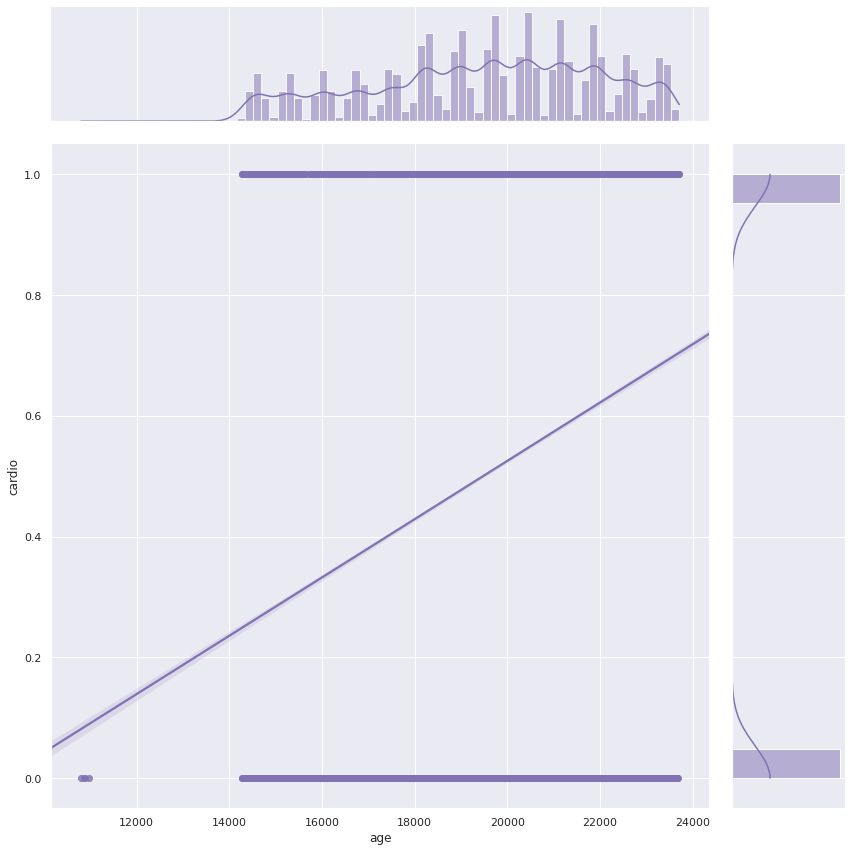

In [19]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="age", y="cardio", data=df,
                  kind="reg", truncate=False,
                  color="m", height=12)

In [20]:
    #selon la tranche d'age le cardio un patient peut etre plus a rique que d'autre

In [21]:
#Exploration des données
df.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [22]:
df.groupby('age').mean()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,,,,,,,,,,,,
10798,31922.0,2.0,175.0,92.0,100.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
10859,43842.0,1.0,159.0,59.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
10878,8850.0,1.0,175.0,59.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
10964,79749.0,1.0,160.0,59.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
14275,45362.0,1.0,164.0,105.0,150.0,110.0,3.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23687,52297.0,2.0,163.0,55.0,120.0,80.0,3.0,1.0,1.0,0.0,1.0,1.0
23690,29892.0,1.0,165.0,63.0,150.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
23692,72373.0,2.0,167.0,68.0,120.0,80.0,2.0,2.0,0.0,0.0,0.0,1.0


In [23]:
df.groupby('cholesterol').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,,
1,49883.917381,19283.308084,1.359168,164.590283,73.053862,126.608705,93.733741,1.099093,0.085196,0.048067,0.802367,0.440107
2,50064.959682,19604.875799,1.329459,163.880406,76.666464,134.788250,105.838098,1.335218,0.105666,0.076134,0.799037,0.602157
3,50437.649516,20512.962311,1.311059,163.425490,78.773085,136.092239,104.542400,1.924870,0.086412,0.064344,0.818125,0.765435


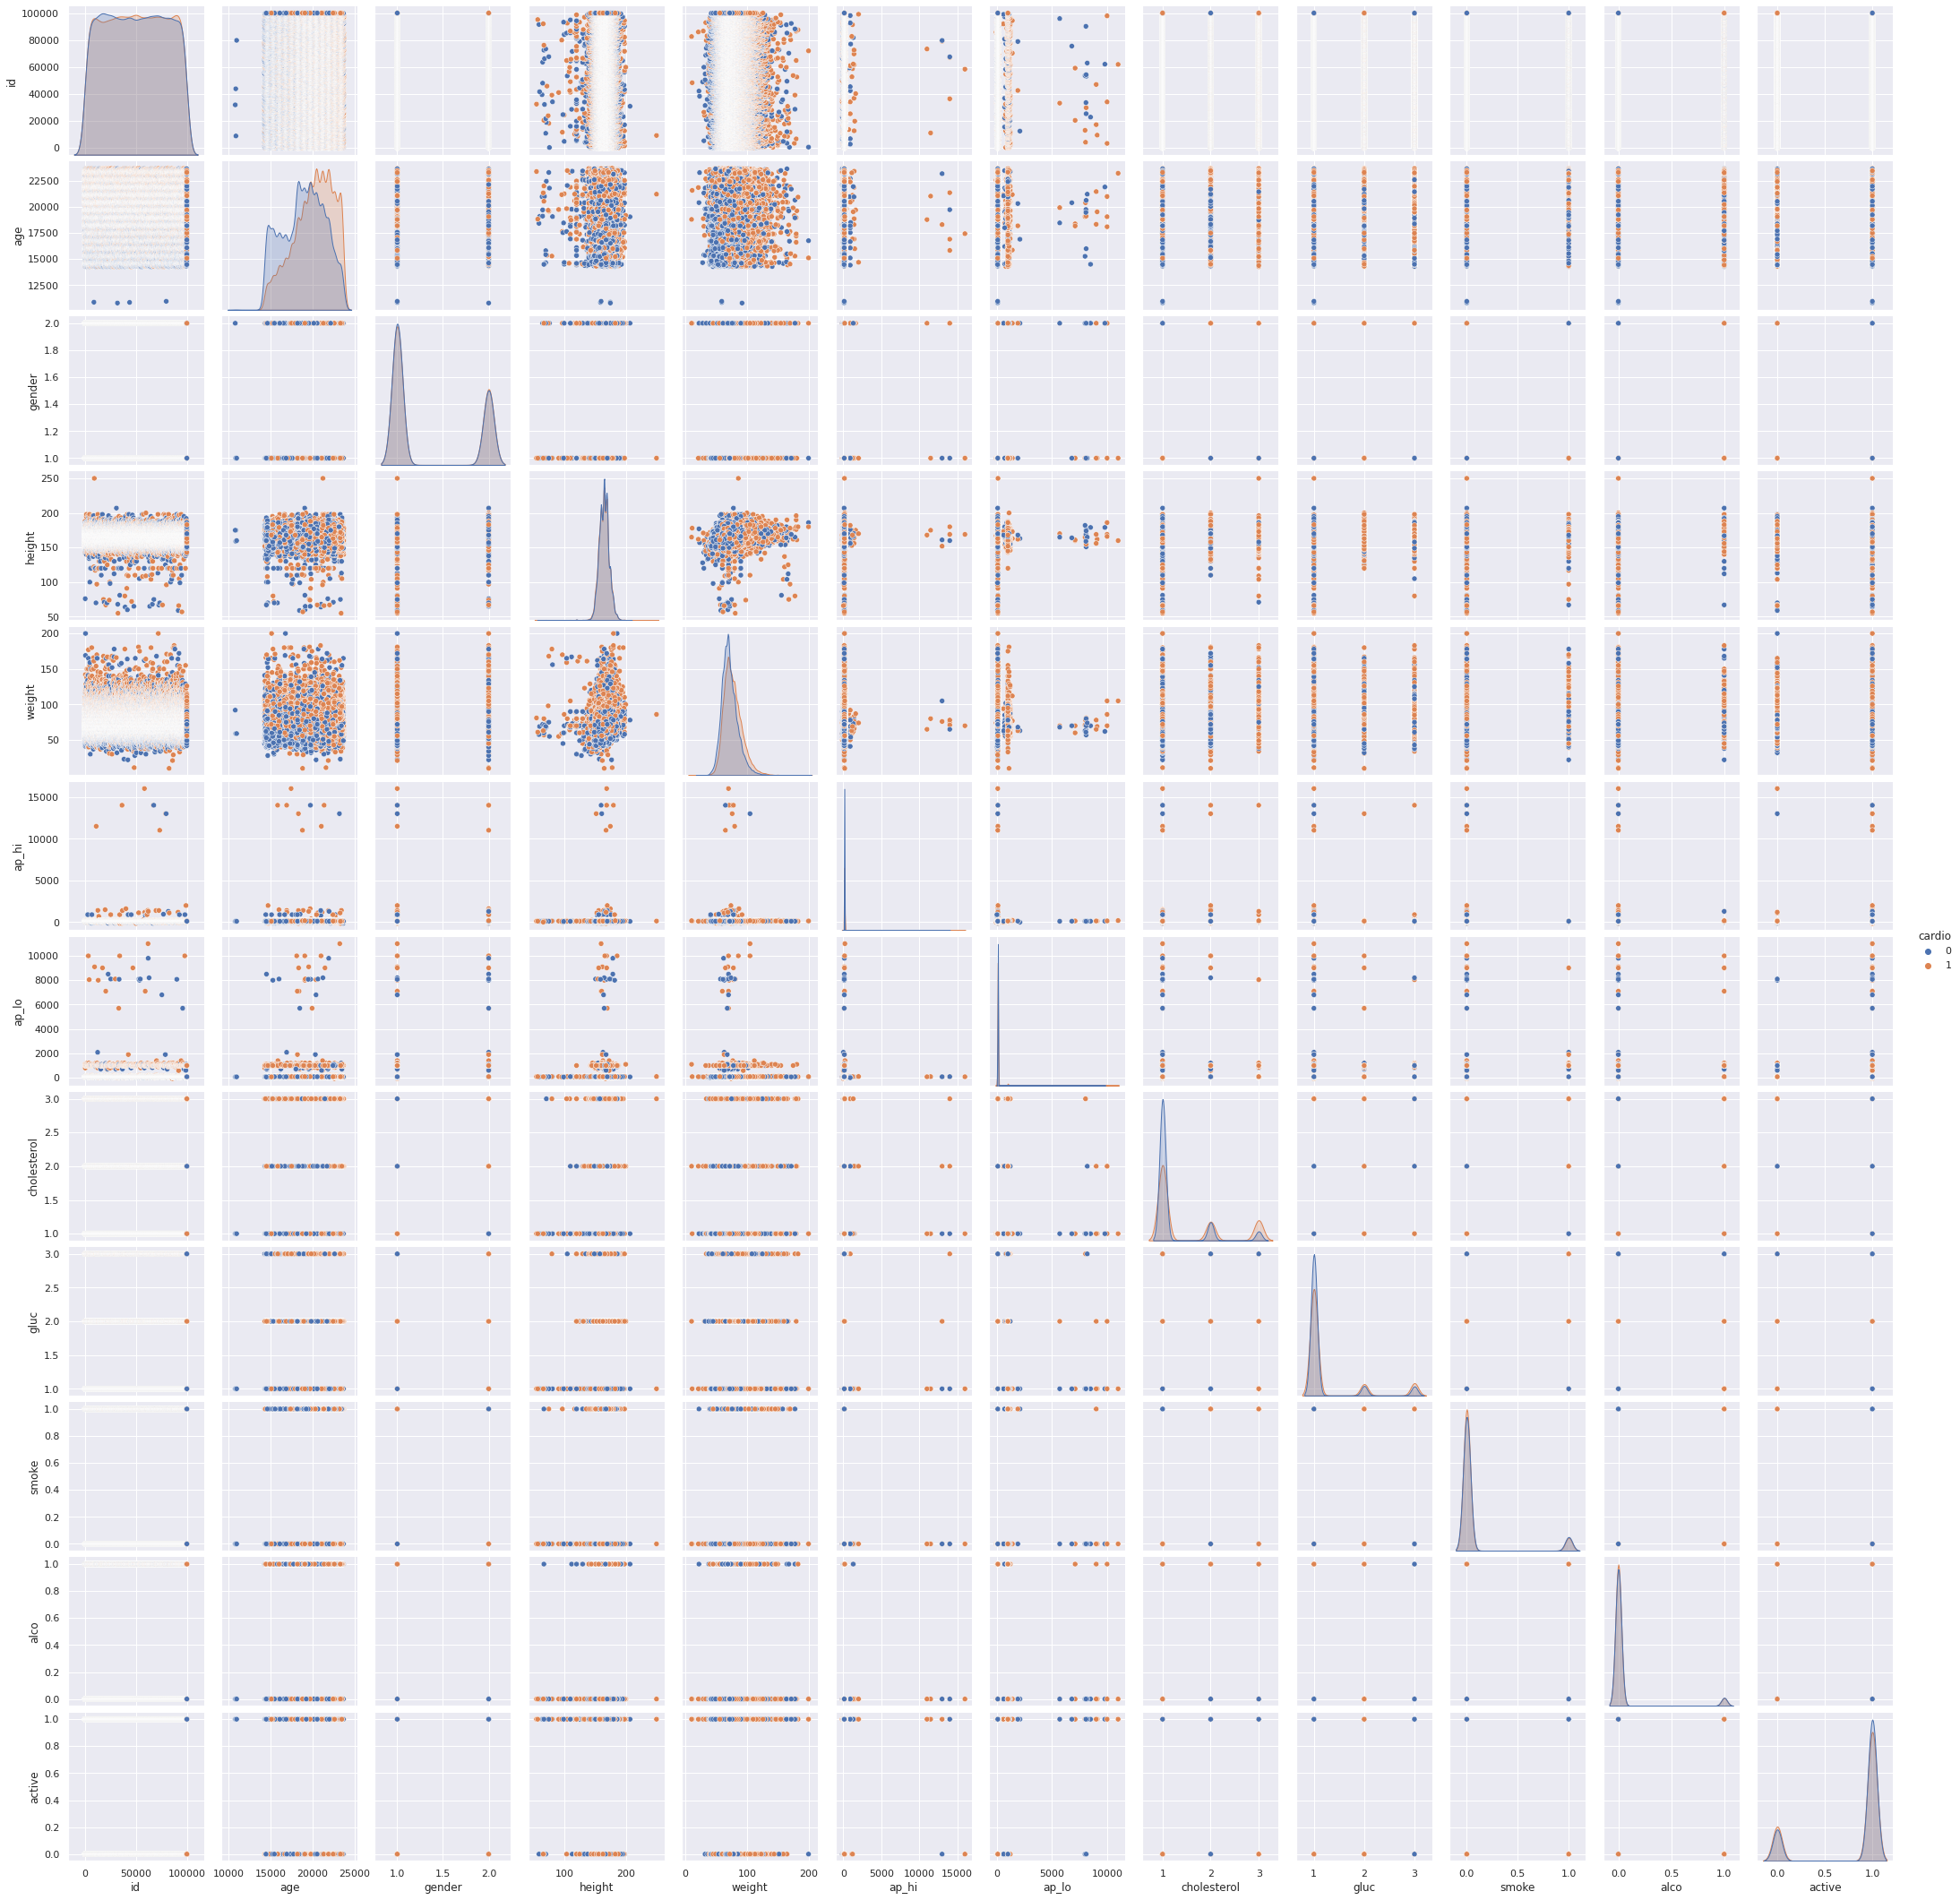

In [50]:
sns.pairplot(df, hue="cardio");


Text(0, 0.5, 'risque cardio')

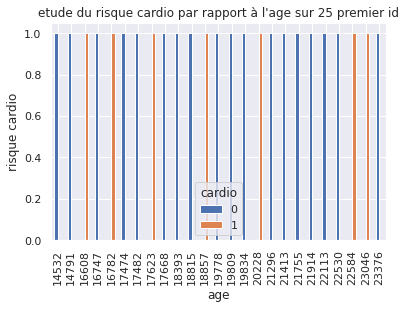

In [24]:
%matplotlib inline
pd.crosstab(df['age'][:25],df['cardio'][:25]).plot(kind='bar')
plt.title("etude du risque cardio par rapport à l'age sur 25 premier id")
plt.xlabel('age')
plt.ylabel('risque cardio')


Text(0, 0.5, 'risque cardio')

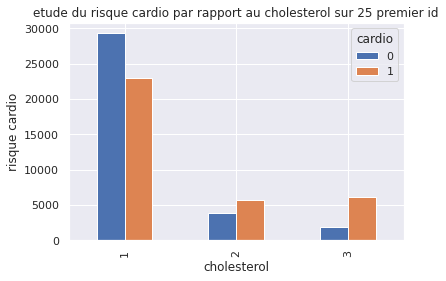

In [25]:
%matplotlib inline
pd.crosstab(df['cholesterol'],df['cardio']).plot(kind='bar')
plt.title("etude du risque cardio par rapport au cholesterol sur 25 premier id")
plt.xlabel('cholesterol')
plt.ylabel('risque cardio')

Text(0, 0.5, 'risque cardio')

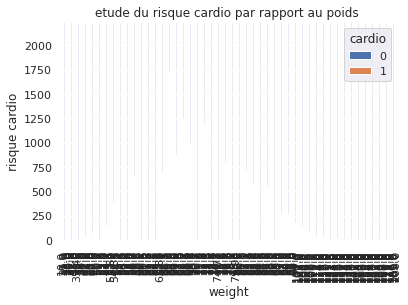

In [26]:
%matplotlib inline
pd.crosstab(df['weight'],df['cardio']).plot(kind='bar')
plt.title("etude du risque cardio par rapport au poids ")
plt.xlabel('weight')
plt.ylabel('risque cardio')

Text(0, 0.5, 'risque cardio')

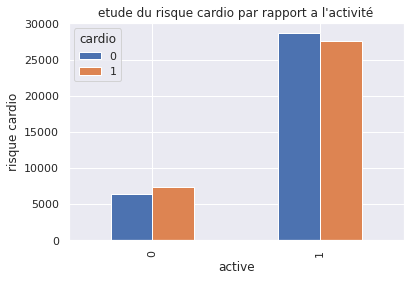

In [27]:
%matplotlib inline
pd.crosstab(df['active'],df['cardio']).plot(kind='bar')
plt.title("etude du risque cardio par rapport a l'activité")
plt.xlabel('active')
plt.ylabel('risque cardio')

Text(0, 0.5, 'risque cardio')

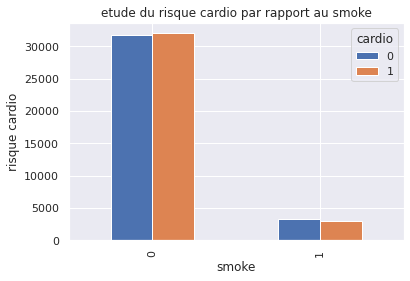

In [28]:
%matplotlib inline
pd.crosstab(df['smoke'],df['cardio']).plot(kind='bar')
plt.title("etude du risque cardio par rapport au smoke")
plt.xlabel('smoke')
plt.ylabel('risque cardio')

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(df))

print('\nles max data:\n',scaler.data_max_,'\n')

print('normalisation des données:\n',scaler.transform(df))



MinMaxScaler()

les max data:
 [9.9999e+04 2.3713e+04 2.0000e+00 2.5000e+02 2.0000e+02 1.6020e+04
 1.1000e+04 3.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00] 

normalisation des données:
 [[0.00000000e+00 5.88075881e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00001000e-05 7.30158730e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.00002000e-05 6.24003097e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [9.99970000e-01 6.40185830e-01 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.99990000e-01 9.00735579e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.54316686e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


# Stockage des features dans X et de la variable cible dans Y

In [30]:
# Stockage des features dans X
X = df.iloc[:,1:-1]
print(X)
print('################################## variable cible #########################################')
# Stockage la variable cible dans Y
Y =df.iloc[:,-1]
print(Y)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  
0         0      

# Suppression des données abérentes et non utiles

In [31]:
###suppression de data aberantes
seuil = VarianceThreshold(threshold = (0.4 * (1 - 0.8)))
print('seuil: ',seuil)
aa = seuil.fit_transform(X)
print(aa.shape)


seuil:  VarianceThreshold(threshold=0.07999999999999999)
(70000, 10)


<AxesSubplot:>

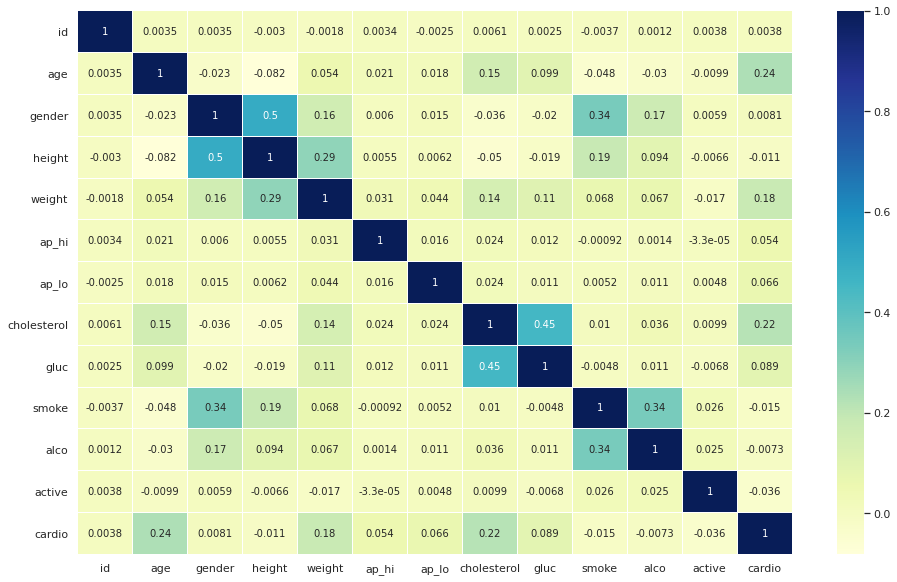

In [32]:
#visualisation de la matrice de correlation des new données
import seaborn as sns 
matrice_corr = df.corr()
f, ax = plt.subplots(figsize =(16, 10)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)

    # l'âge,le poids, ap_hi, ap_lo, le cholesterol et le glucide semblent etre les facteurs les plus           impliqués sur le risque cardio que les autres 

## étudions ses arguments avec les prédictions d'algorithmie de la regression logistique

# Préparation des données pour le fitting

In [33]:
##Why do we split the data?

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train, X_test, y_train, y_test) 

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
47339  21876       1     154    80.0    130     90            2     1      0   
67456  16717       2     162    70.0    140     90            1     1      0   
12308  21128       2     174    92.0    150    100            1     1      0   
32557  23366       2     173    76.0    120     82            1     1      0   
664    20281       1     160    60.0    120     80            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
37194  16001       2     170    75.0    150     80            1     1      1   
6265   23209       2     162    73.0    160     90            1     1      0   
54886  23589       1     169    74.0    120     80            1     1      0   
860    18227       1     167    70.0    120     80            1     1      0   
15795  15114       2     177    64.0    120     80            1     1      0   

       alco  active  
47339     0      

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(56000, 11)
(14000, 11)
(56000,)
(14000,)


In [52]:
#comptage des modalités de y
print(y_train.value_counts())
print("#################################")
print(y_test.value_counts())

0    28033
1    27967
Name: cardio, dtype: int64
#################################
1    7012
0    6988
Name: cardio, dtype: int64


# regression logistique simple et fitting

In [35]:
##simple logistical regression
logreg = linear_model.LogisticRegression(solver='lbfgs')
###Train the model
logreg.fit(X_train, y_train)


LogisticRegression()

In [36]:
#prediction
Z = logreg.predict(X_train)
print(Z)

[1 1 1 ... 1 0 0]


# validaton croissée

In [37]:
#tableau de croissement sur les data traning 
Eval_model = pd.crosstab(y_train,Z)

########### score ##############
print('score train: ',logreg .score(X_train, y_train))


Eval_model


score train:  0.6938928571428571


col_0,0,1
cardio,,
0,20398,7635
1,9507,18460


In [38]:
#tableau de croissement sur les data test 

Z_test = logreg.predict(X_test)
print(Z_test)
#tableau de croissement sur les data test 
Eval_model2 = pd.crosstab(y_test,Z_test)

########### score ##############
print('score test: ',logreg .score(X_test, y_test))


Eval_model2

[1 1 1 ... 0 1 0]
score test:  0.6981428571428572


col_0,0,1
cardio,,
0,5103,1885
1,2341,4671


# Autre méthode 


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

MC = confusion_matrix(y_test, logreg.predict(X_test))
MC


array([[5103, 1885],
       [2341, 4671]])

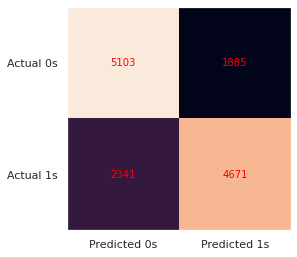

In [40]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.imshow(MC)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, MC[i, j], ha='center', va='center', color='red')
plt.show()


# Rapport de classification des data training

In [41]:
rapport_classification =classification_report(y_train, logreg.predict(X_train))
print(rapport_classification)

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     28033
           1       0.71      0.66      0.68     27967

    accuracy                           0.69     56000
   macro avg       0.69      0.69      0.69     56000
weighted avg       0.69      0.69      0.69     56000



# Rapport de classification des data testing

In [42]:
rapport_classification1 =classification_report(y_test, logreg.predict(X_test))
print(rapport_classification1)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



La matrice de confusion et, par conséquent, le taux de reconnaissance en test de 70%

# Améliorer le modèle
    Vous pouvez améliorer votre modèle en définissant différents paramètres. 
    Par exemple, travaillons avec la force de régularisation Cégale à 10.0,
    au lieu de la valeur par défaut de 1.0

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [44]:
print(model.intercept_,'\n----------------------')

print(model.coef_,'\n----------------------')
print(model.predict_proba(X_train),'\n----------------------')
model.predict(X_train)

[-0.30946848] 
----------------------
[[ 1.04493614e-04  3.06821148e-01 -4.72974213e-02  1.81132351e-02
   3.16846861e-02  3.37017765e-04  5.35720956e-01 -1.65074857e-01
  -1.08956134e-01 -1.59822524e-01 -2.90170610e-01]] 
----------------------
[[0.22898556 0.77101444]
 [0.37905257 0.62094743]
 [0.30672793 0.69327207]
 ...
 [0.56979947 0.43020053]
 [0.62925341 0.37074659]
 [0.80522975 0.19477025]] 
----------------------


array([1, 1, 1, ..., 0, 0, 0])

0.7052678571428571 
----------------------


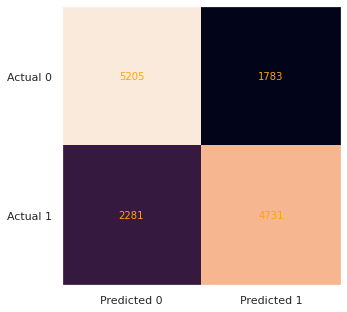

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      6988
           1       0.73      0.67      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [45]:
print(model.score(X_train, y_train),'\n----------------------')

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')
plt.show()

print(classification_report(y_test, model.predict(X_test)))

Après amélioration et optimisation,le taux de reconnaissance en test est passé de 70% à 71% 

# interpretation

### Sur l'ensemble de la série de tests, 74 % des patients sont sans risque cardio

Representation graphique:
Une méthode très courante consiste à utiliser la courbe des caractéristiques de fonctionnement du récepteur (ROC).

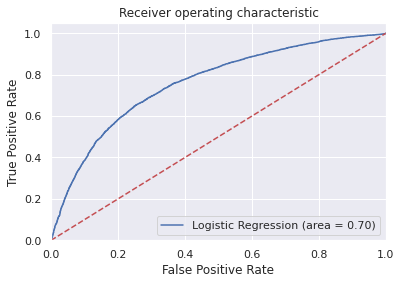

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

La courbe des caractéristiques de fonctionnement du récepteur (ROC) est un autre outil couramment utilisé avec les classificateurs binaires. La ligne en pointillé représente la courbe ROC d'un classificateur purement aléatoire; un bon classificateur reste aussi loin que possible de cette ligne (vers le coin supérieur gauche).

La bleu représente nos données et le résultat de l'entrainement de ces dernières.

# Ajoutons une courbe donnant une parfaite représentation d'un bon entrainement de prédiction
    #Cela permet de comparer et d'évaluer notre modèle actuel à un perfait modèle de prédiction

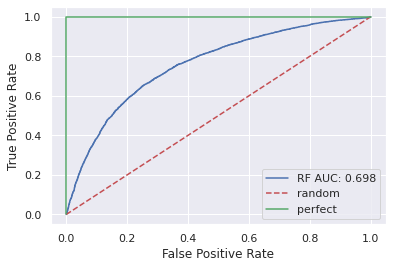

In [47]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,'b-',label = 'RF AUC:% .3f'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Résoudre le cas d’étude présenté ci-dessus avec votre propre classe python sans utiliser la librairie Scikit-Learn.

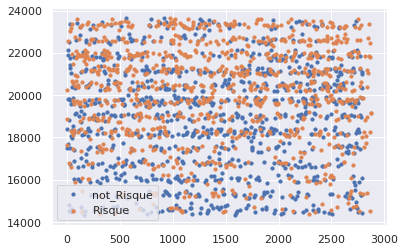

In [48]:
import pandas as pd


data = pd.read_csv('cardio_train.csv',sep=';')


# X = feature values, all the columns except the last column
XD = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
Risque = data.loc[y == 1]

# filter out the applicants that din't get admission
not_Risque = data.loc[y == 0]

# plots sur les 1000 premiers patients
plt.scatter(not_Risque.iloc[:1000, 0], not_Risque.iloc[:1000, 1], s=10, label='not_Risque')
plt.scatter(Risque.iloc[:1000, 0], Risque.iloc[:1000, 1], s=10, label='Risque')
plt.legend()
plt.show()




# Implémentation en classe

MaxAbsScaler()
normalisation des données:
 [[0.00000000e+00 7.75650487e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00001000e-05 8.53034201e-01 5.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.00002000e-05 7.95217813e-01 5.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [9.99970000e-01 8.04031544e-01 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.99990000e-01 9.45936828e-01 5.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 8.66191541e-01 5.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
[[4958 2009]
 [3613 3420]]


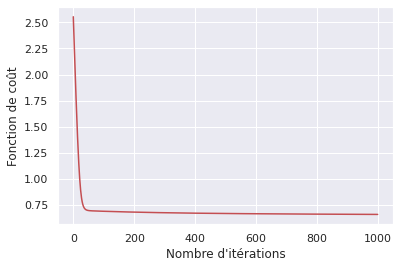

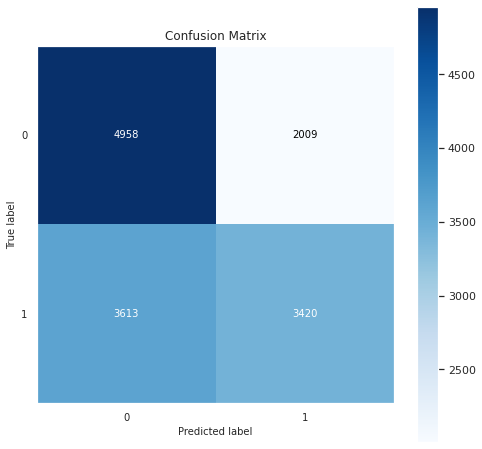

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      6967
           1       0.63      0.49      0.55      7033

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.59     14000
weighted avg       0.60      0.60      0.59     14000



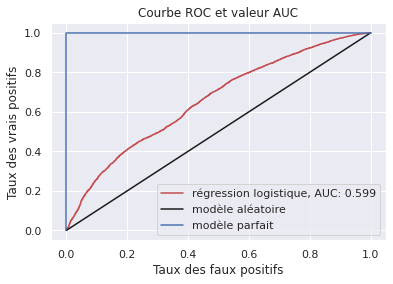

In [49]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
import scikitplot as skplt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score, train_test_split



data = pd.read_csv('cardio_train.csv',sep=';')

#Normalisation des donnnées
scaler = MaxAbsScaler()
print(scaler.fit(data))
print('normalisation des données:\n',scaler.transform(data))



# X = feature values, all the columns except the last column
XD = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]


class LogisticRegression_created:
    def __init__(self):
        self.self=self
    
    def model(self,XD,Theta):
        proba=1./(1.+np.exp(-np.matmul(XD,Theta)))
        proba=proba.flatten()
        return proba
    def cost_function(self,XD, y, theta):
        return (-1./len(y)) * np.sum(y.dot(np.log(self.model(XD, theta)))+(1.-y).dot(np.log(1-self.model(XD, theta))))
    
    def gradient(self,XD,Theta,y):
        return (1./len(y))* XD.T.dot(self.model(XD, Theta) - y)
    
    def gradientdescent(self,XD,theta,y, learning_rate, nb_iterations):
        cost_history=[]
        for i in range(0, nb_iterations):
            theta = theta - learning_rate * self.gradient(XD,theta,y)
            cost_history.append(self.cost_function(XD, y, theta))
        return theta,cost_history
   
    def fit(self,XD,theta,y,learning_rate, nb_iterations):
        return self.gradientdescent(XD,theta,y, learning_rate, nb_iterations)
   
X_multi2=pd.DataFrame(np.c_[data['age'],data['gender'],data['height'],data['weight'],data['ap_hi'],data['ap_lo'],
                            data['cholesterol'],data['smoke'],data['gluc'],data['alco'],data['active']], 
                      columns = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','smoke','gluc',
                                 'alco','active'])
Y_multi2=pd.DataFrame(np.c_[data['cardio']])
x0 = np.ones((len(X_multi2),1)) #
X_extended=np.hstack((x0,X_multi2))# Ajout de la colonne [1 1 1 1....1] à la matrice X
max_abs_scaler2 = preprocessing.MaxAbsScaler()
X_train_maxabs2 = max_abs_scaler2.fit_transform(X_extended)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train_maxabs2,Y_multi2.to_numpy().flatten(), test_size = 0.2, random_state=5)# subdivision: 80% données entrainement du modèle, 20% données test
learning_rate=0.1
nb_iterations= 1000
theta = [1]*len(X_train2[0])
regressionmodel_created=LogisticRegression_created()
Theta, cost_history=regressionmodel_created.fit(X_train2,theta,Y_train2,learning_rate,nb_iterations)

#Affichachage de la variation de la fonction de coût
x=range(nb_iterations)
plt.plot(x,cost_history,'r')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût')

#-----test-----------------------------------
y_test_predict_proba2=regressionmodel_created.model(X_test2,Theta)
y_test_predict2 = np.array(list(map(round,y_test_predict_proba2)))
y_test_predict2 = y_test_predict2.astype(int)

#-----------Affiche de résultats----------------------
#la matrice de confusion
confusion_matrix2 = confusion_matrix(Y_test2, y_test_predict2)#calcul de la matrice de confusion
print(confusion_matrix2)
skplt.metrics.plot_confusion_matrix(
    Y_test2, 
    y_test_predict2,
    figsize=(8,8))
plt.show()
#rapport de classification
report2=classification_report(Y_test2, y_test_predict2)
print(report2)

#Courbe ROC et valeur AUC
fpr2, tpr2,threshold2=roc_curve(Y_test2, y_test_predict_proba2) #roc_curve
auc2=roc_auc_score(Y_test2, y_test_predict2) #roc_auc_score
plt.plot(fpr2,tpr2,label='régression logistique, AUC: %.3f'%auc2,c='r')
plt.plot([0,1],[0,1],label='modèle aléatoire',c='k')
plt.plot([0,0,1,1],[0,1,1,1],label='modèle parfait',c='b')
plt.xlabel('Taux des faux positifs')
plt.ylabel('Taux des vrais positifs')
plt.title('Courbe ROC et valeur AUC')
plt.legend()
plt.show()



# Exemple d'un cas particulier:

    Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de
    cholestérol au dessus de la normal et un taux de glucose normal, une tension
    artérielle systolique dans la moyenne et une pression sanguine diastolique
    correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est
    un sujet à risques cardio-vasculaires.

In [56]:
#convertir en prédiction brute
predSm = np.where(y_test_predict2 > 0.5, 1, 0)
print(np.unique(predSm,return_counts=True))

(array([0, 1]), array([8571, 5429]))


# Interprétation
Sur les 14000 individus en test, 8571 sont associés à la classe « 0 », 5429 à « 1 donc à risque»

In [58]:
#matrice de confusion
mcSm = pd.crosstab(y_test,predSm)
print(mcSm)

#transformer en matrice Numpy
mcSmNumpy = mcSm.values


col_0      0     1
cardio            
0       4216  2772
1       4355  2657


Et nous pouvons en déduire les différents indicateurs de performances, notamment le taux de
reconnaissance (ou taux de succès) et le taux d’erreur.


In [60]:
#taux de reconnaissance
accSm = np.sum(np.diagonal(mcSmNumpy))/np.sum(mcSmNumpy)
print("Taux de reconnaissance : %.4f" % (accSm))
#taux d'erreur
errSm = 1.0 - accSm
print("Taux d'erreur' : %.4f" % (errSm))

Taux de reconnaissance : 0.4909
Taux d'erreur' : 0.5091


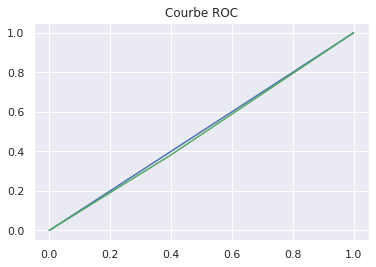

In [61]:
#importer le module metrics
#de la librairie scikit-learn
import sklearn.metrics as metrics
#colonnes pour les courbes ROC
#fpr (false positive rate -- taux de faux positifs) en abscisse
#tpr (true positive rate – taux de vrais positifs) en ordonnée
#pos_label = 1 pour indiquer la modalité cible
fprSm, tprSm, _ = metrics.roc_curve(y_test,y_test_predict2,pos_label=1)
#graphique -- construire la diagonale de référence
#cas du modèle qui ne fait pas mieux que l’affectation des probabilités
#au hasard – notre courbe ne doit pas passer en dessous
#plus il s’en écarte vers le haut, mieux c’est
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
#rajouter notre diagramme
plt.plot(fprSm,tprSm,"g")
#titre
plt.title("Courbe ROC")
#faire apparaître le graphique
plt.show()

Par cette méthode de statmodel nous avons un mauvais prédicteur ce qui voudrait dire que notre model a été mal entrainé.